## sickit-learn 個人的tips
scikit-learnは機械学習、データ分析には必須のライブラリです。個人的な勉強も込めてメモを残しておきます。

### sickit-learn 目次

1. [公式データセット](/article/library/sklearn/datasets/) <= 本節
2. [データの作成](/article/library/sklearn/makedatas/)
3. [線形回帰](/article/library/sklearn/linear_regression/)
4. [ロジスティック回帰](/article/library/sklearn/logistic_regression/)

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa/blob/master/src/sklearn/datasets/ds_nb.ipynb)


### 筆者の環境

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G2022


In [2]:
!python -V

Python 3.7.3


In [3]:
import sklearn

sklearn.__version__

'0.20.3'

データ表示用にpandasもimportしておきます。

In [4]:
import pandas as pd

pd.__version__

'1.0.3'

画像表示用にmatplotlibもimportします。画像はwebでの見栄えを考慮して、svgで保存する事とします。

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

## 概要
scikit-learnは機械学習に必要なデータセットを用意してくれています。ここでは公式サイトにそってサンプルデータの概要を説明します。

1. toy dataset
2. 実際のデータセット

## toy datasets

toyというのは、おそらく簡易的なデータで、実際の機械学習のモデル生成には不十分な量という意味だと思います。

### boston住宅価格のデータ

- target: 住宅価格
- 回帰問題

In [6]:
from sklearn.datasets import load_boston

boston = load_boston()


最初なので少し丁寧にデータを見ていきます。

In [7]:
type(boston)

sklearn.utils.Bunch

データタイプはsklearn.utils.Bunch型だとわかります。

In [8]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

DESCR, data, feature_names, filename, targetのプロパティを持つ事がわかります
一つ一つの属性値を見ていきます。DESCRは、データに関する説明、filenameはデータのファイルの絶対パスなので省略します。

#### boston.data
実際に格納されているデータです。分析対象とする各特徴量が格納されています。説明変数とも言うようです。

In [9]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

#### boston.feature_names
各特徴量の名前です。

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### boston.target
予測するターゲットの値です。公式サイトによるとbostonの場合は価格の中央値（Median Value）となります。

In [11]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

pandasで読み込みます。

In [12]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MV'] = pd.DataFrame(data=boston.target)

df.shape

(506, 14)

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


となり、データ数が506個である事がわかります。また、各特徴量の統計量は以下の通りです。

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### アヤメのデータ

- target: アヤメの種類
- 分類問題

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))
print(dir(iris))

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [16]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['IRIS'] = pd.DataFrame(data=iris.target)
df.shape

(150, 5)

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),IRIS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


最初の5個のデータだと0しかないので、ランダムサンプリングしてみると以下のようになります。

In [18]:
df.sample(frac=1, random_state=0).reset_index().head()

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),IRIS
0,114,5.8,2.8,5.1,2.4,2
1,62,6.0,2.2,4.0,1.0,1
2,33,5.5,4.2,1.4,0.2,0
3,107,7.3,2.9,6.3,1.8,2
4,7,5.0,3.4,1.5,0.2,0


各特徴量は以下の通りです。日本語に訳しましたが、あまりぴんと来ませんね。

<div class="table_center_45">

|英語名 |日本名|
|:---:|:---:|
|sepal length |がく片の長さ  |
|sepal width | がく片の幅 |
|petal length | 花びらの長さ |
|petal width  | 花びらの幅 |

</div>

また、IRISというターゲットの値は0,1,2となっており、それらは`iris.target_names`で確認する事ができます。

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

このリストのインデックスと対応しており、表にすると以下の様になります。

<div class="table_center_30">

|index |IRIS|
|:---:|:---:|
|0 |setosa  |
|1 | versicolor |
|2 | virginica |

</div>

### 糖尿病患者のデータ

- target: 基準時から糖尿病の状態
- 回帰問題

In [20]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(type(diabetes))
print(dir(diabetes))
print(diabetes.feature_names)
print(diabetes.data.shape)

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'data_filename', 'feature_names', 'target', 'target_filename']
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)


In [21]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['QM'] = diabetes.target # QM : quantitative measure 
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,QM
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### 手書きデータ

- target:0~9までの数字
- 分類問題

データは`digits.images`と`digits.data`の中に入っていますが、imagesは二次元配列でdataは8x8の一次元配列で格納されています。

In [22]:
from sklearn.datasets import load_digits

digits = load_digits()

print(type(digits))
print(dir(digits))
print(digits.data.shape)
print(digits.images.shape)
print(digits.target_names)

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'images', 'target', 'target_names']
(1797, 64)
(1797, 8, 8)
[0 1 2 3 4 5 6 7 8 9]


一番最初に格納されているデータは以下の様になっています。

In [23]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


`digits.images[0]`を画像化してみます。

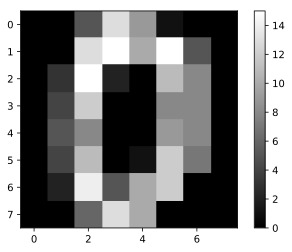

In [24]:
plt.imshow(digits.images[0], cmap='gray')
plt.grid(False)
plt.colorbar()

何となく0に見えますね。色合いを変えてみます。

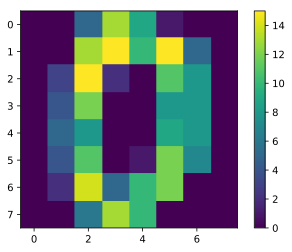

In [25]:
plt.imshow(digits.images[0])
plt.grid(False)
plt.colorbar()

グレースケールより見やすいでしょうか？変わらないですかね･･･
もちろん、これらのデータに対して、正解のデータが与えられています。

In [26]:
print(digits.target[0])

0


### 生理学的データと運動能力のデータ

- target: 生理学的データ（体重、ウェスト、脈拍） (日本語訳の不正確かもしれません)
- 回帰問題

運動能力から体重やウェストなどの身体的特徴を求める問題


In [27]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()

print(type(linnerud))
print(dir(linnerud))

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'data_filename', 'feature_names', 'target', 'target_filename', 'target_names']


In [28]:
df1 = pd.DataFrame(data=linnerud.data, columns=linnerud.feature_names)
df2 = pd.DataFrame(data=linnerud.target, columns=linnerud.target_names)

In [29]:
df1.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [30]:
df2.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


### ワインのデータ

- target: ワインの種類
- 分類問題

In [31]:
from sklearn.datasets import load_wine

wine = load_wine()

print(type(wine))
print(dir(wine))
print(wine.feature_names)

print(wine.target)
print(wine.target_names)

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'target', 'target_names']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']


pandasで読み込んでみます。ターゲットの名前をWINEとして、`wine.target`を追加します。

In [32]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['WINE'] = pd.DataFrame(data=wine.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WINE
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


先頭から5個のサンプリングだとWINEの列がすべて0になってしまったので、ランダムサンプリングしてみます。

In [33]:
df.sample(frac=1, random_state=0).reset_index().head()

,index,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WINE
0,54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0
1,151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2
2,63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
3,55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,0
4,123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1


### 乳がんのデータ

- target: がんの良性/悪性
- 分類問題

In [40]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

print(type(bc))
print(dir(bc))
print(bc.feature_names)
print(bc.target_names)

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


属性がかなり多いです。悪性が良性かの分類問題です。pandasで読み込んでみます。

In [41]:
df = pd.DataFrame(data=bc.data, columns=bc.feature_names)
df['MorB'] = pd.DataFrame(data=bc.target) # MorB means maligant or benign
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,MorB
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


ランダムサンプリングしてみます。

In [42]:
df.sample(frac=1, random_state=0).reset_index().head()

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,MorB
0,512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0
1,457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1
2,439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1
3,298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1
4,37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1


良性の陰性の結果がMorBに見て取れます。

## 参考資料
- [scikit-learn 公式ページ](https://scikit-learn.org/stable/datasets/index.html)